# Customer Churn Analysis

## Project Overview
This project focuses on analyzing customer churn data to uncover patterns, trends, and actionable insights. The analysis is divided into the following steps:
1. Data cleaning to prepare the dataset for analysis.
2. Exploratory Data Analysis (EDA) using graphs and statistical summaries.
3. Addressing key business questions with data-driven insights.

## Dataset
The dataset includes customer demographics, usage behavior, subscription details, and churn information.

## Introduction
Customer churn, also known as customer attrition, refers to the loss of customers over a given period. This metric is critical for businesses as retaining existing customers is often more cost-effective than acquiring new ones. The ability to analyze churn behavior helps organizations identify the factors contributing to churn and implement targeted strategies to improve customer retention.

In this project, we analyze the **Telco Customer Churn dataset**, which contains information about customers' demographics, account details, and service usage. By examining patterns in the dataset, we aim to uncover key drivers of churn and provide actionable insights for businesses to mitigate this issue.

### Objectives
1. **Understand churn behavior**: Analyze customer demographics, subscription details, and service usage to identify trends and correlations.
2. **Visualize churn patterns**: Use statistical summaries and visualizations to highlight the most significant features affecting churn.
3. **Answer business questions**: Address specific queries related to customer behavior, subscription types, and service impact.
4. **Provide actionable insights**: Offer recommendations based on findings to guide business strategies for reducing churn.


## Data Importing and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Convert SeniorCitizen values: 1 -> 'Yes', 0 -> 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Replace blank spaces in TotalCharges with 0
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# Convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# Replace 'Yes' and 'No' with 1 and 0
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Ensure Churn column is numeric 
df['Churn'] = df['Churn'].astype('int')  

C:\Users\HP\AppData\Local\Temp\ipykernel_13000\2503244413.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Question 1: Which gender has the highest churn rate?

In [11]:
# Calculate churn rate by gender
gender_churn = df.groupby('gender')['Churn'].mean()

# Display churn rates
print("Churn rate by gender:")
print(gender_churn)

Churn rate by gender:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64


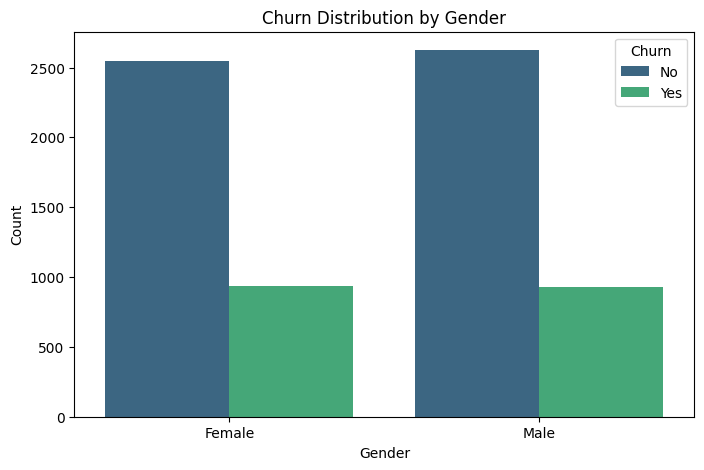

In [12]:
# Visualize churn rate by gender using a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df, palette='viridis')
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


### Key Findings:
 **Gender and Churn**: Both genders have similar churn rates, with females slightly higher at 26.9% compared to males at 26.2%. This indicates that gender does not significantly influence churn in this dataset.

## Question 2: Do senior citizens churn more than younger customers?

In [15]:
# Calculate churn percentages for each Senior Citizen group
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Rename columns for clarity
senior_churn.columns = ['Not Churned (%)', 'Churned (%)']

# Display the result
print(senior_churn)


               Not Churned (%)  Churned (%)
SeniorCitizen                              
No                   76.393832    23.606168
Yes                  58.318739    41.681261


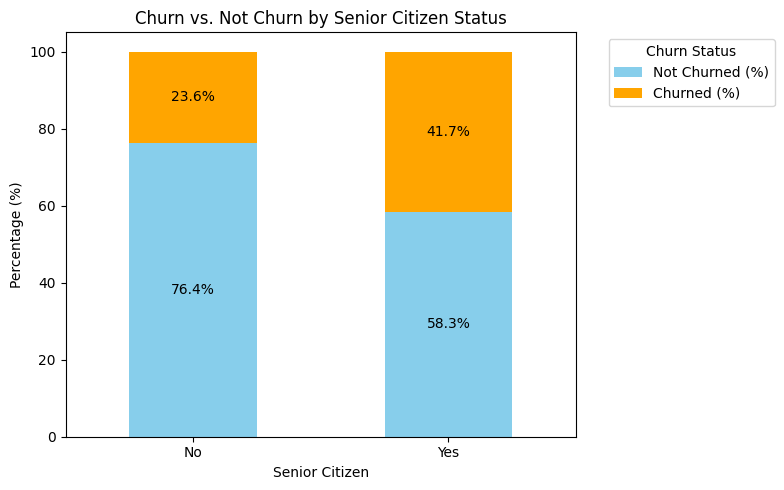

In [16]:
# Plot stacked bar chart
ax = senior_churn.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
    color=["skyblue", "orange"]
)

# Annotate each bar with percentages
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

# Add labels and title
plt.title("Churn vs. Not Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Adjust the legend location to the top-right corner
plt.legend(title="Churn Status", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


### Key Findings 

Senior citizens exhibit a significantly higher churn rate compared to non-senior citizens:
- **Senior Citizens**: 41.7% churn rate.
- **Non-Senior Citizens**: 23.6% churn rate.

This indicates that businesses should consider implementing senior-specific benefits or services to improve retention in this demographic.

## Question 3: Does having dependents reduce churn rates?

In [17]:
# Calculate churn rate by dependents
dependents_churn = df.groupby('Dependents')['Churn'].mean() * 100

# Display churn rates as percentages
print("Churn rate by Dependents status (in %):")
print(dependents_churn)


Churn rate by Dependents status (in %):
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\3636376992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dependents_churn.index, y=dependents_churn.values, palette="coolwarm")


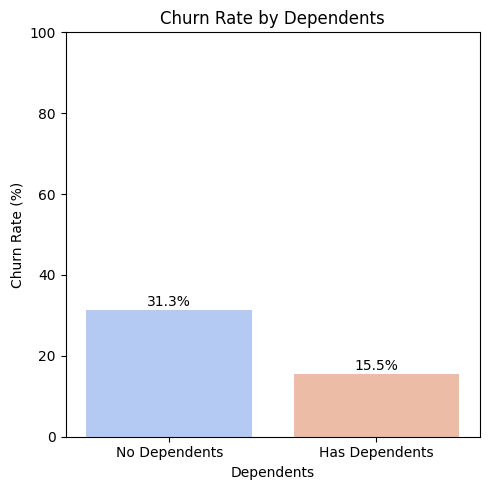

In [18]:
# Visualize churn rate by dependents using a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x=dependents_churn.index, y=dependents_churn.values, palette="coolwarm")
plt.title("Churn Rate by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Churn Rate (%)")
plt.xticks(ticks=[0, 1], labels=["No Dependents", "Has Dependents"], rotation=0)
plt.ylim(0, 100)

# Annotate each bar with the percentage
for i, rate in enumerate(dependents_churn.values):
    plt.text(x=i, y=rate + 1, s=f"{rate:.1f}%", ha="center", color="black")

plt.tight_layout()
plt.show()


## Key Findings

Customers without dependents exhibit a significantly higher churn rate compared to those with dependents:
- **Customers without dependents**: ~31.3% churn rate.
- **Customers with dependents**: ~15.5% churn rate.

This suggests that customers with family responsibilities may have greater service loyalty. Businesses could focus on retention strategies for single or independent customers.

## Question 4: How does contract type impact churn rates?

In [19]:
# Calculate churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].mean() * 100

# Display churn rates as percentages
print("Churn rate by Contract type (in %):")
print(contract_churn)


Churn rate by Contract type (in %):
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\2715806215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y=contract_churn.values, palette="viridis")


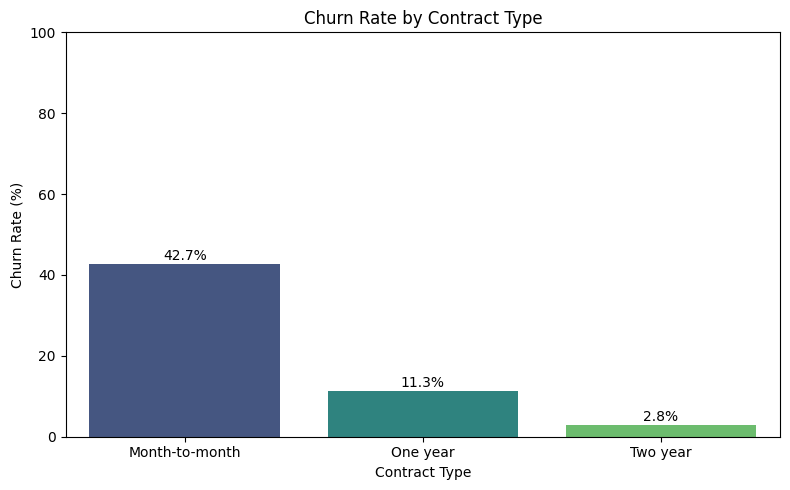

In [20]:
# Visualize churn rate by contract type using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette="viridis")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, 100)

# Annotate each bar with the percentage
for i, rate in enumerate(contract_churn.values):
    plt.text(x=i, y=rate + 1, s=f"{rate:.1f}%", ha="center", color="black")

plt.tight_layout()
plt.show()


## Key Findings

The churn rates for different contract types are as follows:
- **Month-to-Month Contracts**: ~42.7% churn rate.
- **One-Year Contracts**: ~11.3% churn rate.
- **Two-Year Contracts**: ~2.8% churn rate.

This shows that customers on short-term contracts (e.g., Month-to-Month) are significantly more likely to churn compared to those on longer-term contracts. Businesses may consider promoting long-term contracts with incentives to improve customer retention.

## Question 5: Do customers with higher monthly charges churn more often?

In [21]:
# Calculate average monthly charges for churned and non-churned customers
monthly_charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()

# Display the results
print("Average Monthly Charges by Churn Status:")
print(monthly_charges_churn)


Average Monthly Charges by Churn Status:
Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\1484414127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")


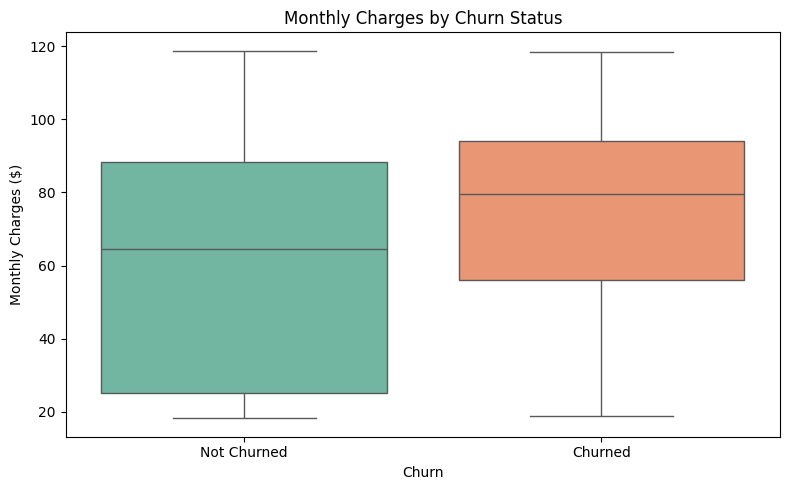

In [22]:
# Visualize monthly charges distribution by churn status using a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"], rotation=0)
plt.tight_layout()
plt.show()


## Key Findings

The analysis reveals:
- **Churned Customers**: Have higher average monthly charges (74.44 dollars).
- **Non-Churned Customers**: Have lower average monthly charges (61.27 dollars).

This suggests that higher costs are a significant driver of customer churn. Businesses may consider cost-sensitive retention strategies to address this issue.


## Question 6: Does the tenure of customers impact churn rates?

In [23]:
# Calculate average tenure for churned and non-churned customers
tenure_churn = df.groupby('Churn')['tenure'].mean()

# Display the results
print("Average Tenure by Churn Status:")
print(tenure_churn)


Average Tenure by Churn Status:
Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\1185641973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")


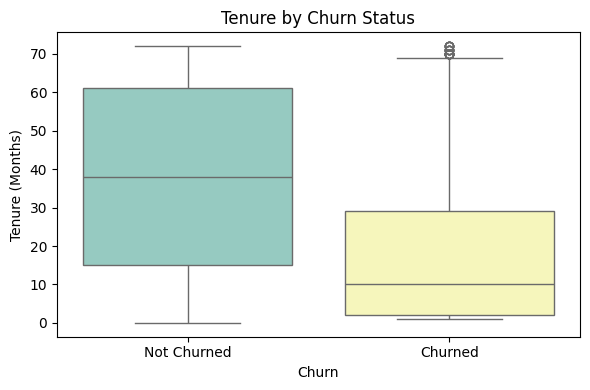

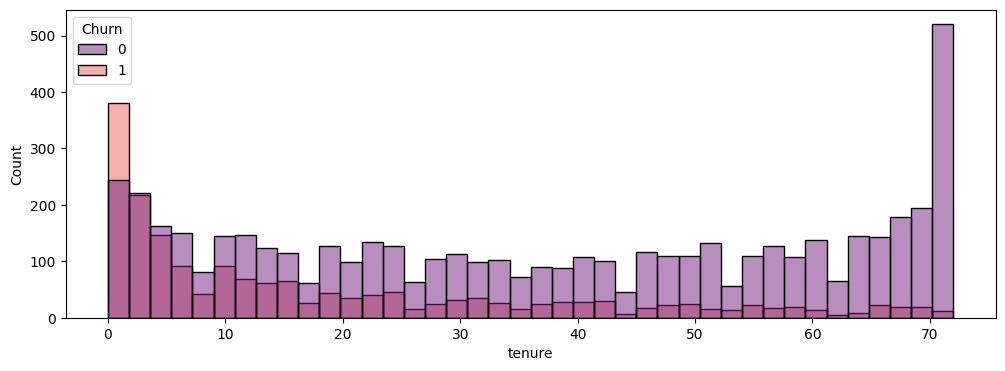

In [36]:
# Visualize tenure distribution by churn status using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")
plt.title("Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"], rotation=0)
plt.tight_layout()
plt.show()



plt.figure(figsize = (12,4))
sns.histplot(x = "tenure", data = df,bins = 40, hue = "Churn", palette="magma")
plt.show()

## Key Findings

The analysis reveals:
- **Churned Customers**: Have significantly shorter average tenure (~18 months).
- **Non-Churned Customers**: Have significantly longer average tenure (~38 months).

This suggests that tenure is strongly associated with loyalty. Businesses may consider rewarding long-term customers with incentives to encourage retention.


## Question 7: Does the use of additional services (e.g., streaming, phone, etc.) impact churn rates?

In [135]:
# Calculate churn rates for additional services (StreamingTV, StreamingMovies, PhoneService)
services = ['StreamingTV', 'StreamingMovies', 'PhoneService']
for service in services:
    churn_rate = df.groupby(service)['Churn'].mean() * 100
    print(f"Churn rate by {service} (in %):\n{churn_rate}\n")


Churn rate by StreamingTV (in %):
StreamingTV
No                     33.523132
No internet service     7.404980
Yes                    30.070188
Name: Churn, dtype: float64

Churn rate by StreamingMovies (in %):
StreamingMovies
No                     33.680431
No internet service     7.404980
Yes                    29.941435
Name: Churn, dtype: float64

Churn rate by PhoneService (in %):
PhoneService
No     24.926686
Yes    26.709637
Name: Churn, dtype: float64



posx and posy should be finite values
posx and posy should be finite values


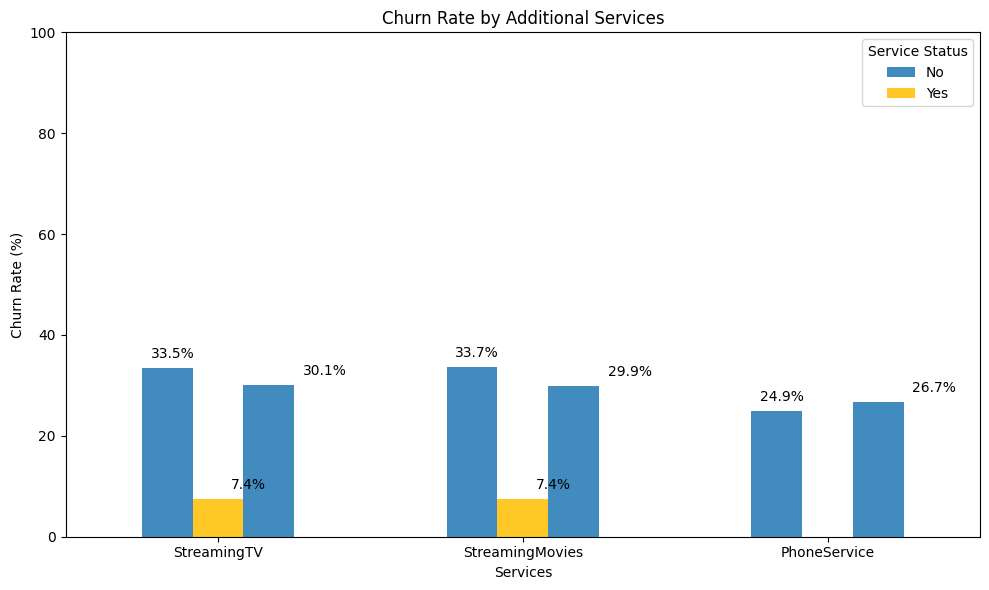

In [144]:
# List of services to analyze
services = ['StreamingTV', 'StreamingMovies', 'PhoneService']

# Calculate churn rates for each service
service_churn_data = {}
for service in services:
    churn_rate = df.groupby(service)['Churn'].mean() * 100
    service_churn_data[service] = churn_rate

# Convert to a DataFrame for visualization
service_churn_df = pd.DataFrame(service_churn_data)

# Transpose for easier plotting
service_churn_df = service_churn_df.T

# Plot grouped bar chart with updated vibrant colors
service_churn_df.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#1f77b4', '#ffbf00'],  # Teal and gold for vibrant visuals
    alpha=0.85
)
plt.title("Churn Rate by Additional Services")
plt.xlabel("Services")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Add annotations for each bar
for i, service in enumerate(service_churn_df.index):
    for j, rate in enumerate(service_churn_df.loc[service]):
        plt.text(x=i + j * 0.25 - 0.15, y=rate + 2, s=f"{rate:.1f}%", ha="center", color="black")

plt.legend(title="Service Status", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


## Key Findings

The analysis reveals:
- **StreamingTV**: Customers without StreamingTV have the highest churn rate (33.5%), followed by those with StreamingTV (30.1%). Customers with no internet service have the lowest churn rate (7.4%).
- **StreamingMovies**: Customers without StreamingMovies have the highest churn rate (33.7%), compared to 29.9% for those with StreamingMovies. Customers with no internet service again have the lowest churn rate (7.4%).
- **PhoneService**: Customers without PhoneService have a slightly lower churn rate (24.9%) compared to customers with PhoneService (26.7%).

These findings suggest that offering bundled services like streaming and phone services could help improve customer retention by increasing engagement and perceived value.

## Question 8: Do customers with paperless billing churn more than those without?

In [38]:
# Calculate churn rate by PaperlessBilling status
paperless_billing_churn = df.groupby('PaperlessBilling')['Churn'].mean() * 100

# Display churn rates as percentages
print("Churn rate by Paperless Billing status (in %):")
print(paperless_billing_churn)


Churn rate by Paperless Billing status (in %):
PaperlessBilling
No     16.330084
Yes    33.565092
Name: Churn, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\75590042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paperless_billing_churn.index, y=paperless_billing_churn.values, palette=["#4CAF50", "#F44336"])  # Green and red for contrast


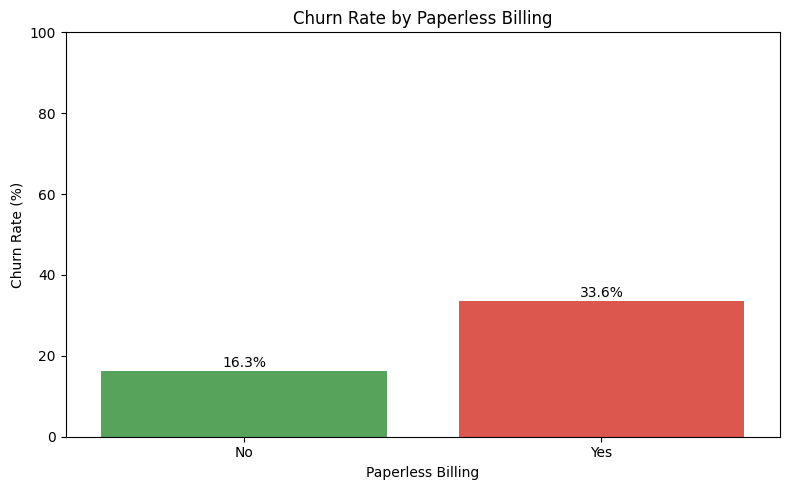

In [39]:
# Visualize churn rate by PaperlessBilling using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=paperless_billing_churn.index, y=paperless_billing_churn.values, palette=["#4CAF50", "#F44336"])  # Green and red for contrast
plt.title("Churn Rate by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Rate (%)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.ylim(0, 100)

# Annotate each bar with the percentage
for i, rate in enumerate(paperless_billing_churn.values):
    plt.text(x=i, y=rate + 1, s=f"{rate:.1f}%", ha="center", color="black")

plt.tight_layout()
plt.show()


## Key Findings

The analysis reveals:
- **Customers with Paperless Billing**: Have a significantly higher churn rate (33.6%).
- **Customers without Paperless Billing**: Have a much lower churn rate (16.3%).

This suggests that customers using paperless billing may be more likely to churn. Businesses could address this by providing additional notifications or personalized engagement to retain these customers.

## Question 9: Does the payment method affect churn rates?

In [42]:
# Calculate churn rates for each payment method
payment_method_churn = df.groupby('PaymentMethod')['Churn'].mean() * 100

# Display churn rates as percentages
print("Churn rate by Payment Method (in %):")
print(payment_method_churn)


Churn rate by Payment Method (in %):
PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\4222950773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


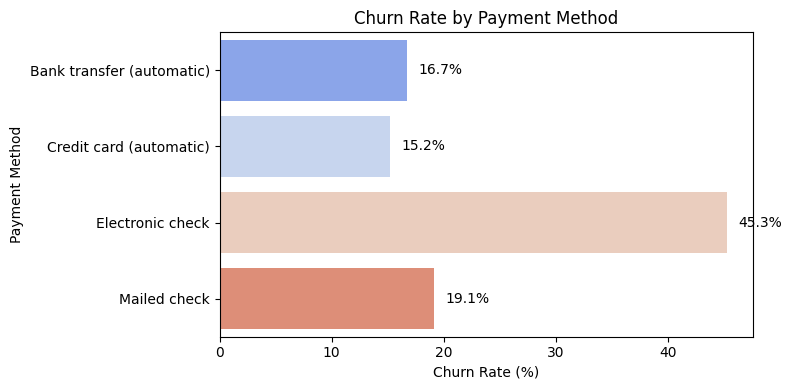

In [67]:
# Horizontal bar chart for churn rate by payment method
plt.figure(figsize=(8, 4))
sns.barplot(
    x=payment_method_churn.values,
    y=payment_method_churn.index,
    palette="coolwarm"
)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Payment Method")

# Annotate bars with percentages
for i, rate in enumerate(payment_method_churn.values):
    plt.text(x=rate + 1, y=i, s=f"{rate:.1f}%", va="center", color="black")

plt.tight_layout()
plt.show()


## Key Findings 

The analysis reveals:
- **Electronic Checks**: Customers using electronic checks have the highest churn rate (45.3%).
- **Mailed Checks**: Have a moderate churn rate (19.1%).
- **Bank Transfers (Automatic)**: Have a lower churn rate (16.7%).
- **Credit Cards (Automatic)**: Have the lowest churn rate (15.2%).

These findings suggest that automated payment methods (e.g., credit card or bank transfer) are associated with lower churn rates. Businesses could focus on encouraging the use of these methods to improve customer retention.

## Question 10: How does internet service type impact churn rates?

In [45]:
# Calculate churn rates by Internet Service type
internet_service_churn = df.groupby('InternetService')['Churn'].mean() * 100

# Display churn rates as percentages
print("Churn rate by Internet Service type (in %):")
print(internet_service_churn)


Churn rate by Internet Service type (in %):
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13000\3369059502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


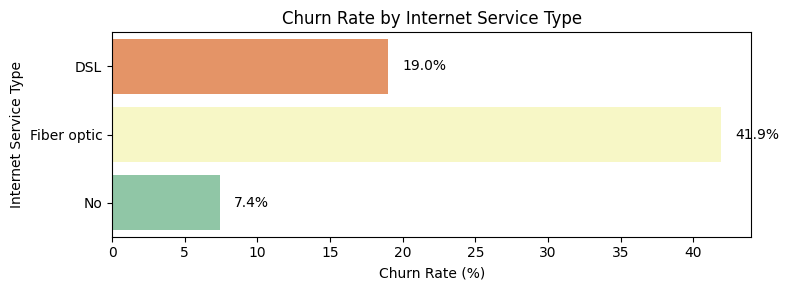

In [48]:
# Horizontal bar chart for churn rate by Internet Service type
plt.figure(figsize=(8, 3))
sns.barplot(
    x=internet_service_churn.values,
    y=internet_service_churn.index,
    palette="Spectral"  # Using Spectral for a visually appealing color palette
)
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Internet Service Type")

# Annotate bars with percentages
for i, rate in enumerate(internet_service_churn.values):
    plt.text(x=rate + 1, y=i, s=f"{rate:.1f}%", va="center", color="black")

plt.tight_layout()
plt.show()


## Key Findings

The analysis reveals:
- **Fiber Optic**: Has the highest churn rate (41.9%) among internet service types.
- **DSL**: Has a moderate churn rate (19.0%).
- **No Internet Service**: Exhibits the lowest churn rate (7.4%).

These findings suggest that fiber optic customers may experience service-related issues or perceive higher costs, leading to higher churn. Businesses could focus on improving the quality of fiber optic service and addressing pricing concerns to reduce churn.


## Question 11: Is there a relationship between total charges and churn behavior?

In [49]:
# Summary statistics of TotalCharges segmented by Churn
total_charges_churn = df.groupby('Churn')['TotalCharges'].describe()

# Display the results
print("Summary statistics for Total Charges by Churn status:")
print(total_charges_churn)


Summary statistics for Total Charges by Churn status:
        count         mean          std    min    25%       50%      75%  \
Churn                                                                      
0      5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1      1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
Churn           
0      8672.45  
1      8684.80  


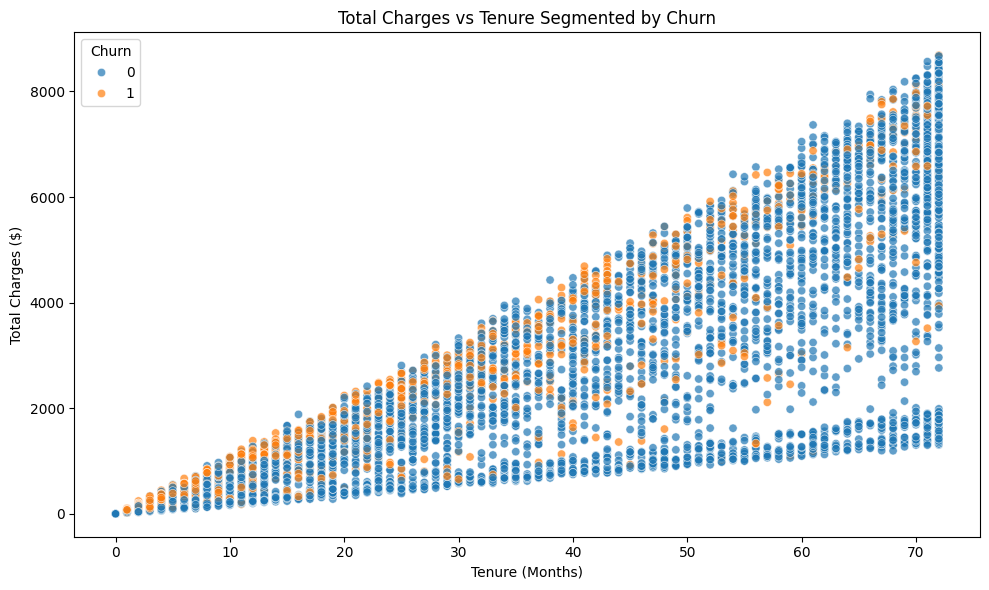

In [66]:
# Scatter plot with corrected legend colors and proper differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    data=df,
    alpha=0.7
)
plt.title("Total Charges vs Tenure Segmented by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges ($)")
plt.tight_layout()
plt.show()


## Key Findings

The analysis reveals:
1. **Churned Customers**: Tend to cluster at the lower end of total charges, with an average of 1,531.80 dollars. This is aligned with their shorter tenure.
2. **Non-Churned Customers**: Have significantly higher total charges on average 2,549.91 dollars, reflecting their longer tenure and sustained payments.
3. **Diagonal Pattern**: A clear diagonal pattern exists, showing that total charges naturally increase with tenure. Churned customers typically exit early, resulting in lower accumulated charges.

These findings suggest that businesses should target customers with shorter tenure for retention strategies, as they are more likely to churn and generate lower revenue over time.


## Summarized Findings
1. Senior citizens have a high churn rate (41.7%), making them a key demographic for retention efforts.
2. Customers on month-to-month contracts exhibit significantly higher churn (42.7%), while longer-term contracts drastically reduce churn.
3. Cost-sensitive customers, identified by higher monthly charges ($74.44), churn more frequently than those paying lower monthly charges ($61.27).
4. Customers with shorter tenure (average of 18 months) are much more likely to churn than long-term customers (average of 38 months).
5. Streaming services and phone service bundling show potential for retention, as customers without these services have slightly higher churn rates.
6. Paperless billing is linked to higher churn (33.6%), highlighting the need for enhanced customer engagement for digital-only users.
7. Automated payment methods like credit cards (15.2% churn) and bank transfers (16.7% churn) are associated with lower churn compared to electronic checks (45.3%).
8. Fiber optic internet has the highest churn rate (41.9%), indicating potential service quality or cost concerns.

## Recommendations
1. **Focus on Senior Citizens**: Offer senior-specific plans or discounts to cater to this demographic's unique needs and reduce their churn rate.
2. **Promote Long-Term Contracts**: Incentivize customers to switch from month-to-month contracts to one- or two-year contracts by offering discounts or added benefits.
3. **Address Cost-Sensitive Customers**: Introduce flexible pricing or discount plans for customers with high monthly charges, as these customers show a higher churn rate.
4. **Improve Retention of New Customers**: Focus on customers in their early tenure (less than 18 months) through onboarding programs, loyalty rewards, and personalized communication to reduce churn.
5. **Encourage Bundled Services**: Promote bundled streaming and phone services to enhance perceived value and engagement, reducing churn in customers without these services.
6. **Enhance Paperless Billing Experience**: Provide reminders and seamless payment experiences for customers using paperless billing, as they exhibit a significantly higher churn rate.
7. **Improve Fiber Optic Service Quality**: Address service issues for fiber optic customers, who have the highest churn rate, to improve satisfaction and retention.
8. **Promote Automated Payment Methods**: Encourage customers to switch to automated payment methods (bank transfers or credit cards), as these are associated with the lowest churn rates.


## Conclusion
This analysis demonstrates that customer churn is influenced by multiple factors, including contract type, monthly charges, tenure, and additional services. By addressing these factors with targeted strategies, businesses can reduce churn and improve customer retention. The insights gained from this project provide a strong foundation for implementing data-driven retention programs.
